In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df_casas = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial/data/SaratogaHouses.csv")
df_casas

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## 🎯 Objetivo del modelo

## ❓ ¿Qué métrica deberíamos priorizar?

---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [101]:
print("El dataset tiene" , df_casas.shape[0], "filas y", df_casas.shape[1], "columnas")

El dataset tiene 1728 filas y 16 columnas


In [102]:
df_casas.columns

Index(['price', 'lotSize', 'age', 'landValue', 'livingArea', 'pctCollege',
       'bedrooms', 'fireplaces', 'bathrooms', 'rooms', 'heating', 'fuel',
       'sewer', 'waterfront', 'newConstruction', 'centralAir'],
      dtype='object')

In [103]:
from funciones.funciones import validate_columns
validate_columns(df_casas)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
price,NaN,1728.0,0,0.0,"[240000, 775000, 476000, 120000, 412500]"
lotSize,NaN,1728.0,0,0.0,"[0.48, 0.48, 0.42, 0.2, 0.39]"
age,NaN,1728.0,0,0.0,"[0, 31, 4, 24, 4]"
landValue,NaN,1728.0,0,0.0,"[90800, 72600, 87200, 14000, 85400]"
livingArea,NaN,1728.0,0,0.0,"[2022, 3968, 2246, 976, 2000]"
pctCollege,NaN,1728.0,0,0.0,"[57, 62, 57, 64, 62]"
bedrooms,NaN,1728.0,0,0.0,"[3, 5, 3, 2, 3]"
fireplaces,NaN,1728.0,0,0.0,"[1, 4, 1, 0, 1]"
bathrooms,NaN,1728.0,0,0.0,"[2.5, 3.5, 2.5, 2.0, 2.5]"
rooms,NaN,1728.0,0,0.0,"[8, 12, 9, 3, 6]"


In [104]:
df_casas.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


---

### →  Veo los tipos de datos con dtypes

In [105]:
df_casas.dtypes

price                int64
lotSize            float64
age                  int64
landValue            int64
livingArea           int64
pctCollege           int64
bedrooms             int64
fireplaces           int64
bathrooms          float64
rooms                int64
heating             object
fuel                object
sewer               object
waterfront          object
newConstruction     object
centralAir          object
dtype: object

In [106]:
df_casas['centralAir'].value_counts().sort_index() #desbalanceo de clases

centralAir
No     1093
Yes     635
Name: count, dtype: int64

In [107]:
for col in df_casas.columns:
    print(f"Value counts for {col}:")
    print(df_casas[col].value_counts())
    print("\n")

Value counts for price:
price
150000    21
225000    21
120000    21
155000    19
195000    18
          ..
470000     1
164400     1
362710     1
381500     1
111300     1
Name: count, Length: 751, dtype: int64


Value counts for lotSize:
lotSize
0.46    85
0.15    74
0.16    72
1.00    64
0.17    41
        ..
1.22     1
1.06     1
1.04     1
1.07     1
4.21     1
Name: count, Length: 170, dtype: int64


Value counts for age:
age
19     93
16     88
18     88
0      83
1      75
       ..
144     1
62      1
99      1
139     1
86      1
Name: count, Length: 136, dtype: int64


Value counts for landValue:
landValue
27000     57
15100     51
15700     46
108900    27
15000     20
          ..
50200      1
193200     1
17100      1
93300      1
43400      1
Name: count, Length: 573, dtype: int64


Value counts for livingArea:
livingArea
1480    49
912     40
2310    16
960     15
1184    14
        ..
1172     1
4128     1
2628     1
1258     1
1959     1
Name: count, Length: 877, dtyp

---

### → Valores outliers

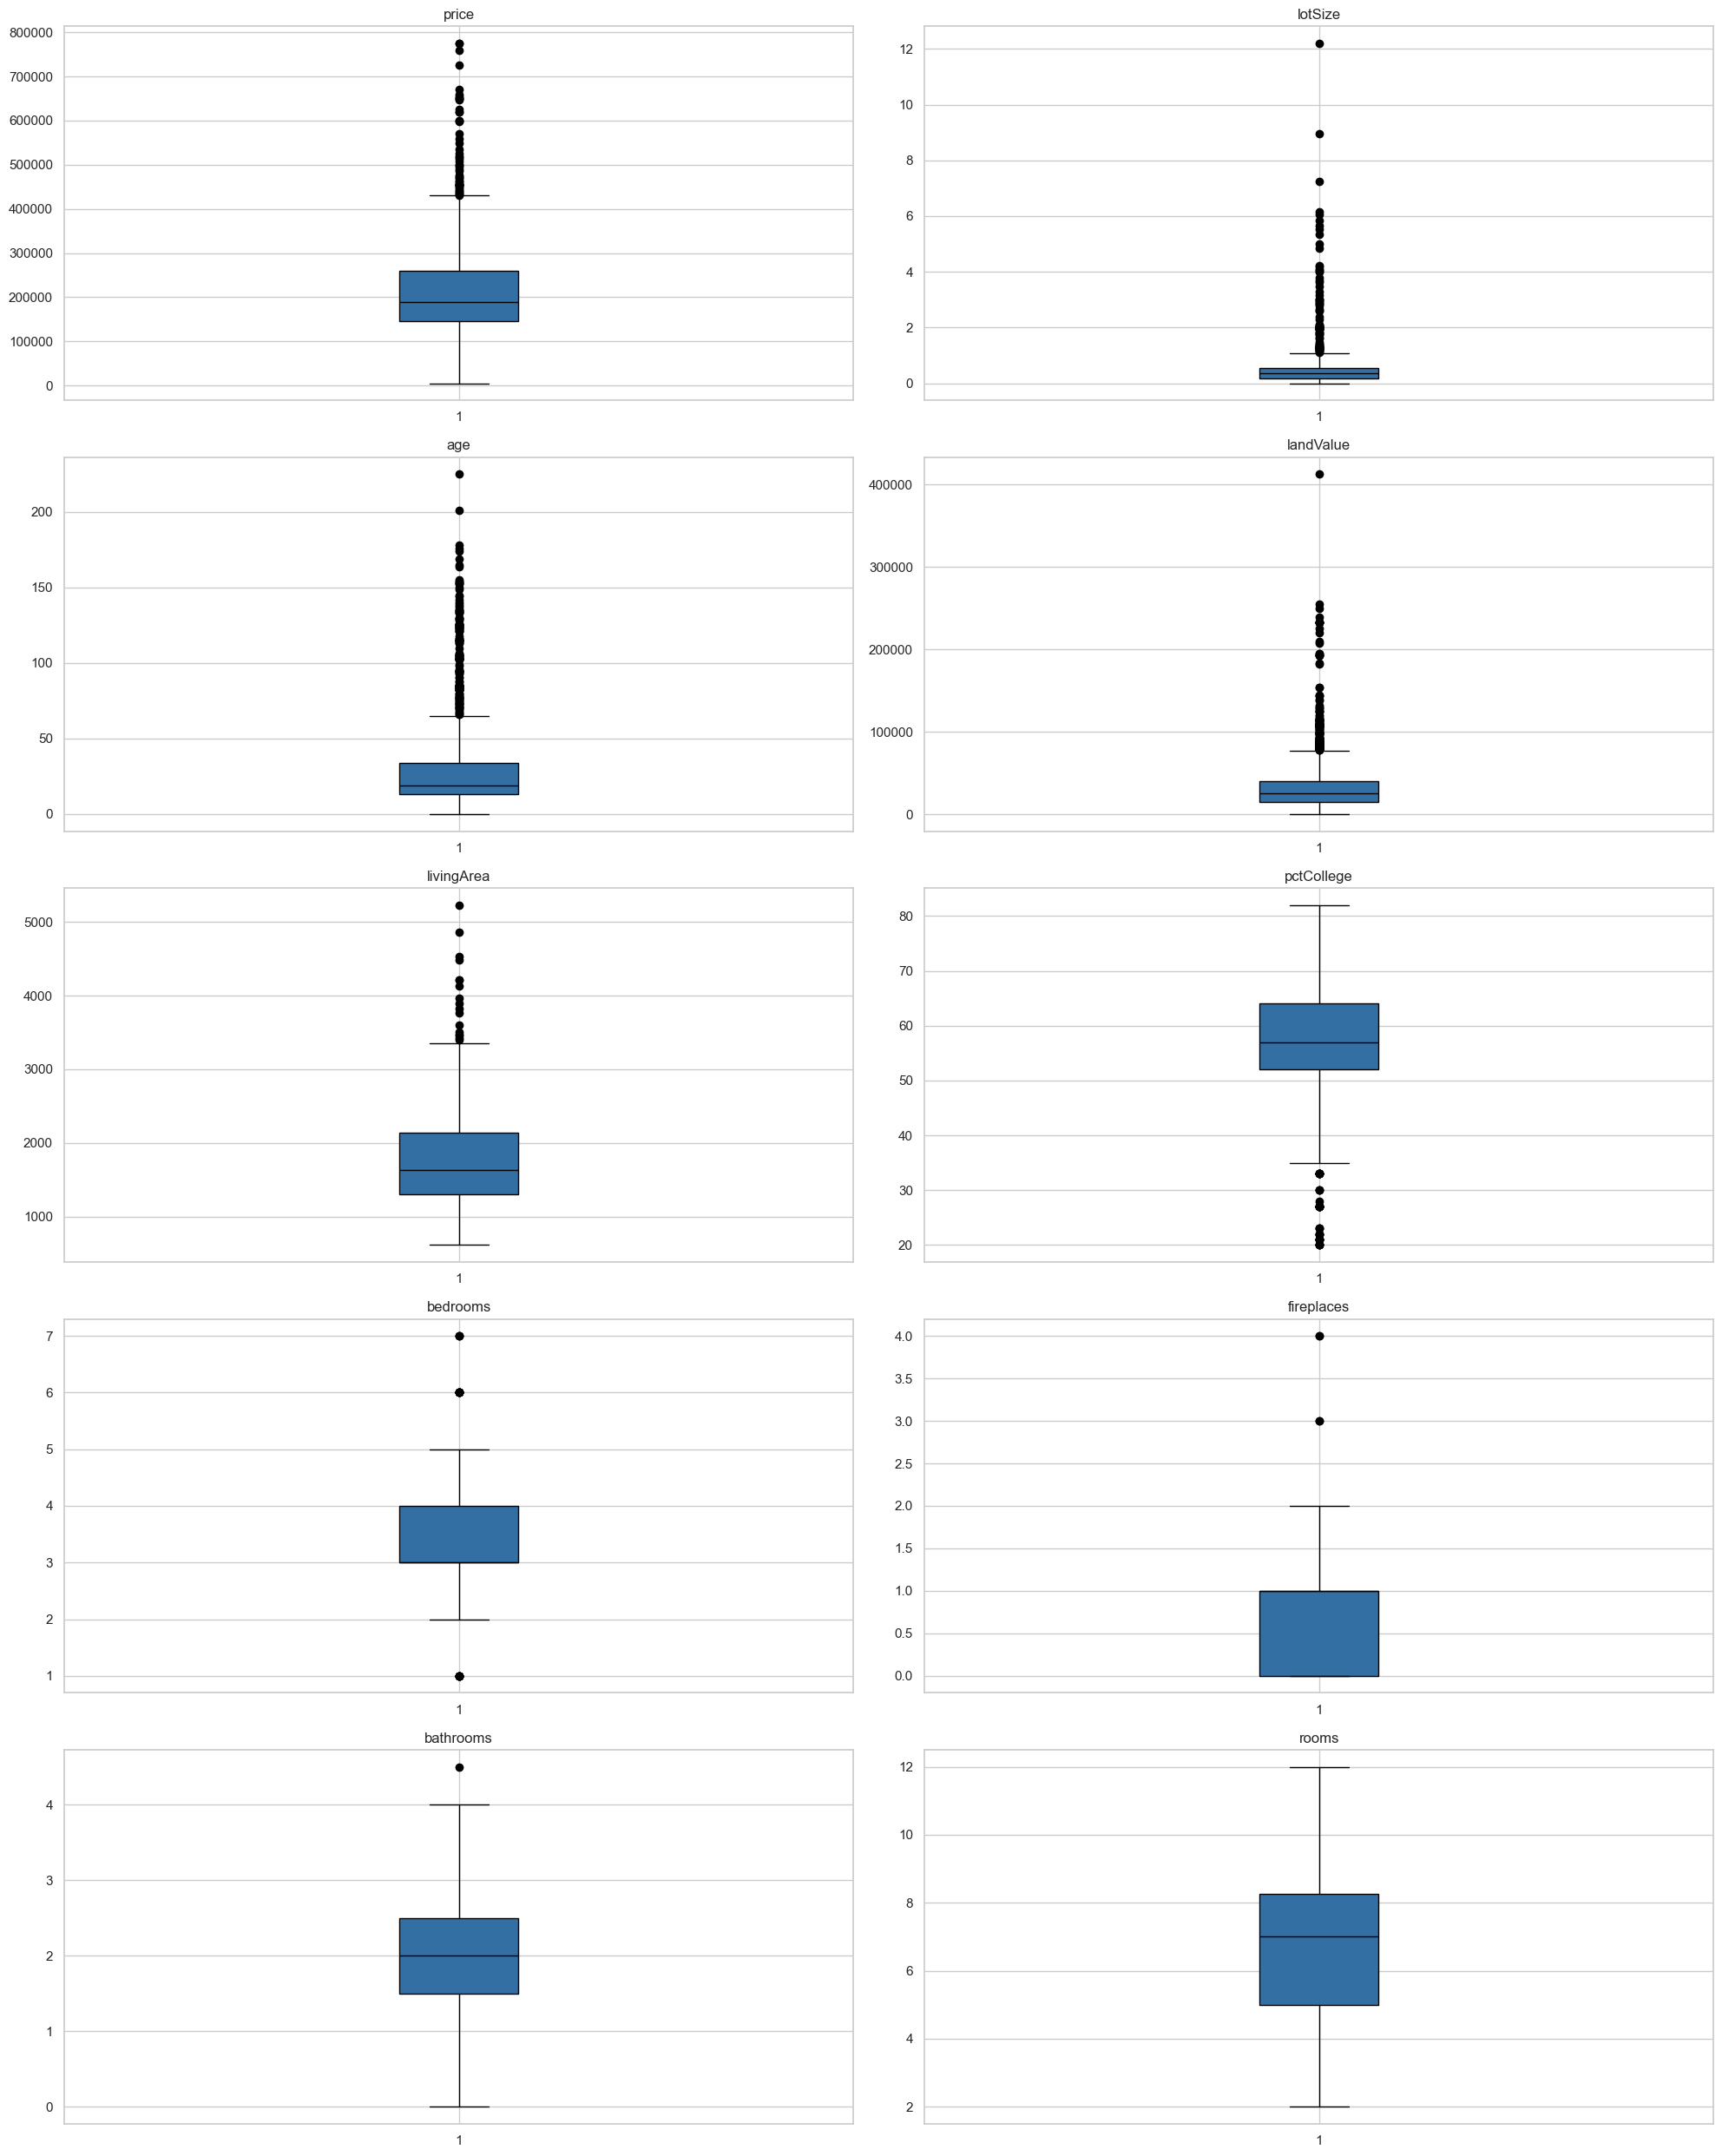

In [108]:
from funciones.funciones import plot_outliers
plot_outliers(df_casas)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos.

In [109]:
from funciones.funciones import reconocimiento_de_outliers
outliers_age, outlier_values_age = reconocimiento_de_outliers(df_casas, "age", 4.5)

Outliers de age:
2       133
13      153
33      201
55      135
62      225
132     153
140     178
246     138
352     133
424     154
469     164
492     134
516     129
554     142
566     169
571     150
686     144
715     135
731     139
748     134
772     154
980     174
1131    165
1156    130
1158    145
1196    140
1202    129
1250    135
1271    152
1289    137
1323    155
1397    130
1566    149
1685    176
Name: age, dtype: int64


In [110]:
def remove_outliers(df, column, outliers):
    if column in df.columns:
        df = df.drop(df[df[column].isin(outliers)].index)
    return df

In [111]:
df_casas = remove_outliers(df_casas, "age", outlier_values_age)

---

## **Parte 2: Análisis Exploratorio de Datos**


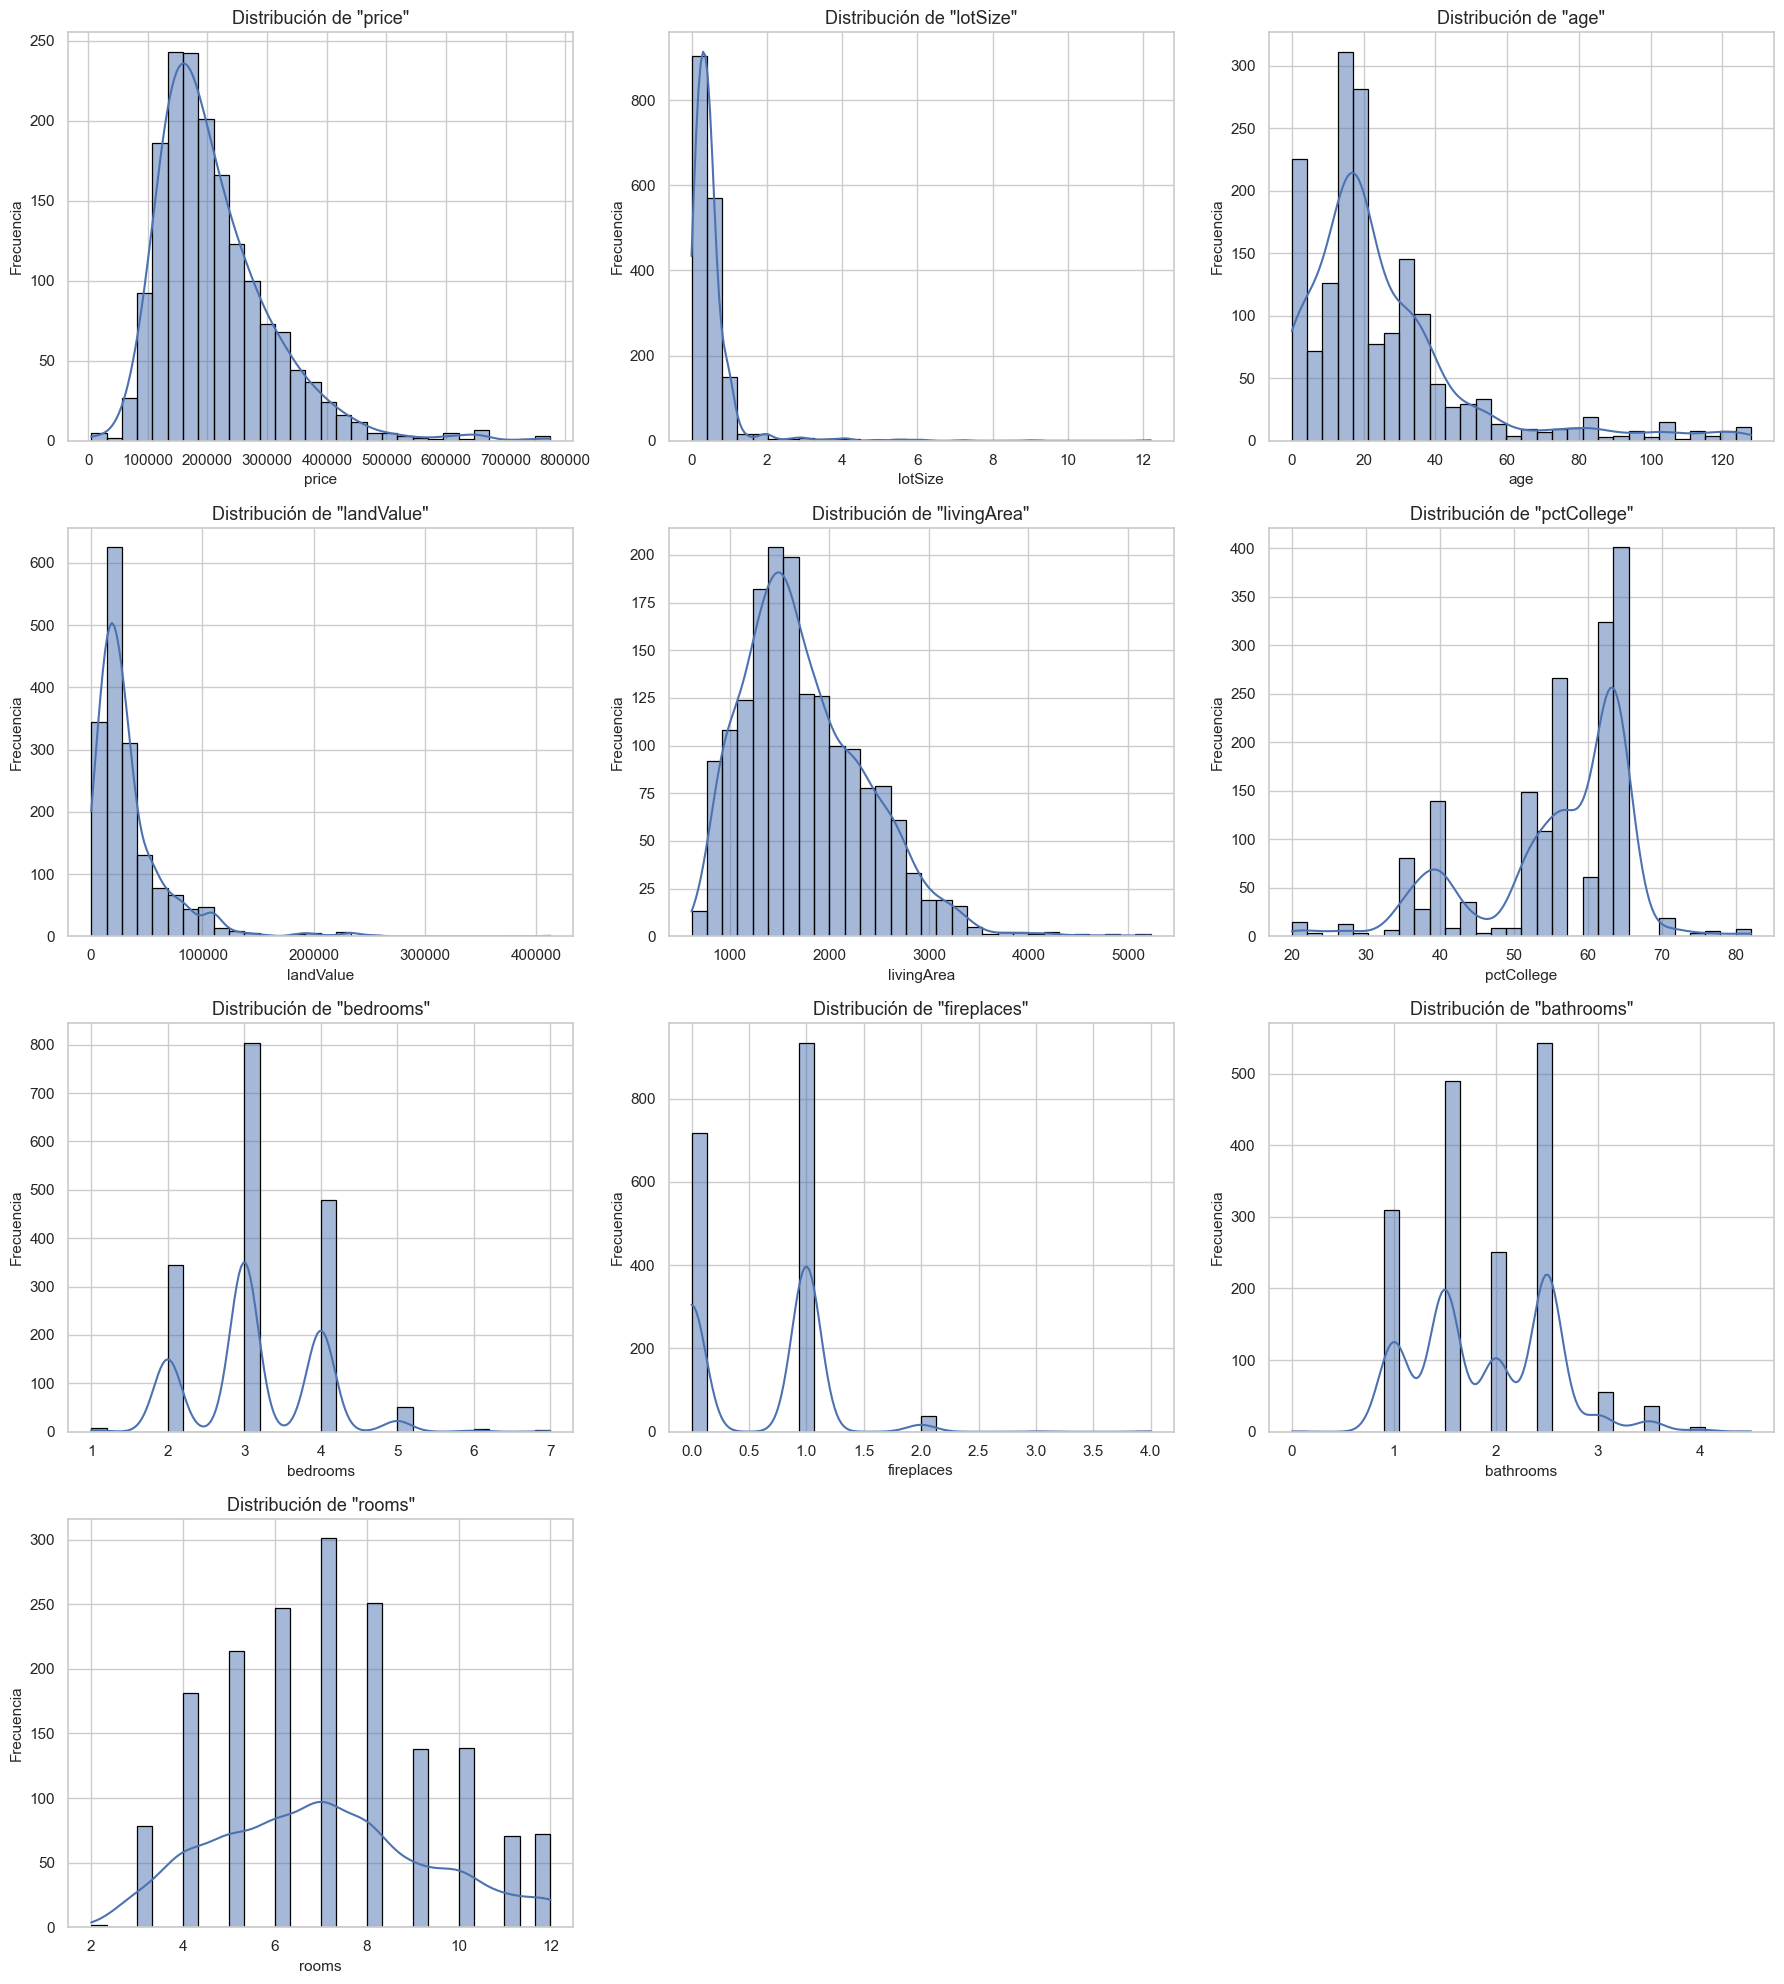

In [112]:
import math
numerical_vars = df_casas.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gráficos y configuración de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer fácilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_casas[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 📊 Conclusiones sobre la distribución de variables numéricas

### 💰 `price` (Precio de la propiedad)
- Distribución **asimétrica positiva** (sesgada a la derecha).
- La mayoría de las propiedades tienen precios entre **50.000 y 250.000 USD**, con pocos valores extremos por encima de 500.000.

### 🌳 `lotSize` (Tamaño del terreno)
- La mayoría de los terrenos son **pequeños** (menos de 1 unidad, posiblemente acres).
- Existen terrenos considerablemente grandes, indicando **outliers** que podrían influir en el modelo.

### 🏗️ `age` (Antigüedad)
- Predominio de propiedades **relativamente nuevas**, con una gran concentración de edades por debajo de los **50 años**.
- Hay propiedades con más de 100 años, pero son casos poco frecuentes.

### 🏞️ `landValue` (Valor del terreno)
- Altamente sesgada a la derecha.
- La mayoría de los terrenos tienen un valor menor a **100.000 USD**.
- Existen terrenos con valor extremadamente alto (posibles outliers).

### 🏠 `livingArea` (Superficie habitable)
- Distribución sesgada a la derecha.
- Las superficies más comunes están entre **1.000 y 2.500 pies cuadrados**, aunque hay algunas propiedades mucho más grandes.

### 🎓 `pctCollege` (% de personas con estudios universitarios en la zona)
- Bimodal: hay **dos concentraciones claras**, alrededor del **30-40%** y del **50-60%**.
- Indica zonas con **niveles educativos mixtos**, que podrían correlacionar con el precio.

### 🛏️ `bedrooms` (Dormitorios)
- Valores más frecuentes: **2 y 3 habitaciones**, con algunos casos extremos de hasta 7 dormitorios.

### 🔥 `fireplaces` (Chimeneas)
- Distribución concentrada: la mayoría de las casas tienen **0 o 1 chimenea**.
- Muy pocas propiedades tienen 2 o más.

### 🛁 `bathrooms` (Baños)
- La mayoría de las casas tienen entre **1 y 3 baños**.
- Distribución con varios picos (posible influencia de la segmentación de mercado).

### 🚪 `rooms` (Total de ambientes)
- Distribución bastante uniforme entre **4 y 10 ambientes**, con picos notables en 6-7 ambientes.
- Puede estar relacionada con la variable `livingArea`.

### 🎯 `high_price` (Precio alto, binaria)
- Clasificación balanceada: aunque hay más propiedades de **precio bajo**, también hay una cantidad considerable de **precio alto**.
- Puede ser una buena variable objetivo (`target`) para un modelo de clasificación.


### → Análisis de sesgos por edad.

In [113]:
edades = sorted(df_casas['age'].unique())
print(edades)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 88, 90, 91, 93, 94, 95, 96, 98, 99, 102, 103, 104, 105, 106, 110, 113, 114, 115, 116, 118, 121, 123, 124, 125, 126, 128]


In [114]:
# df_employees['Attrition'] = df_employees['Attrition'].map({'Yes': 1, 'No': 0})

In [115]:
def grupo_etario(x):
    if x <= 30:
        return "moderna"
    elif 31 <= x <= 45:
        return "intermedia"
    else:
        return "antigua"

df_casas["grupo_etario"] = df_casas["age"].apply(grupo_etario)

In [116]:
rango_precios_por_edad = df_casas.groupby("grupo_etario").agg({"price" : "mean"}).reset_index()
rango_precios_por_edad

,grupo_etario,price
0,antigua,183945.386139
1,intermedia,192819.677083
2,moderna,221852.036545


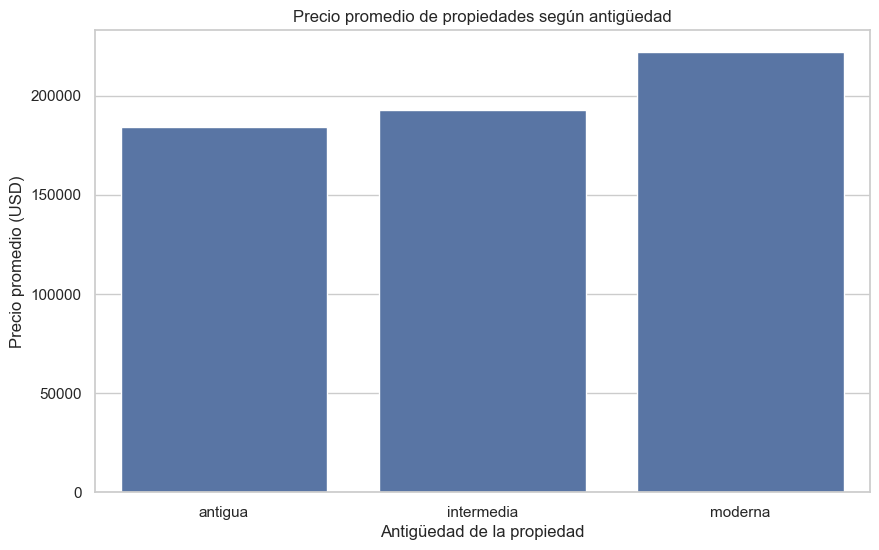

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data=rango_precios_por_edad, x="grupo_etario", y="price")
plt.title("Precio promedio de propiedades según antigüedad")
plt.xlabel("Antigüedad de la propiedad")
plt.ylabel("Precio promedio (USD)")
plt.show()

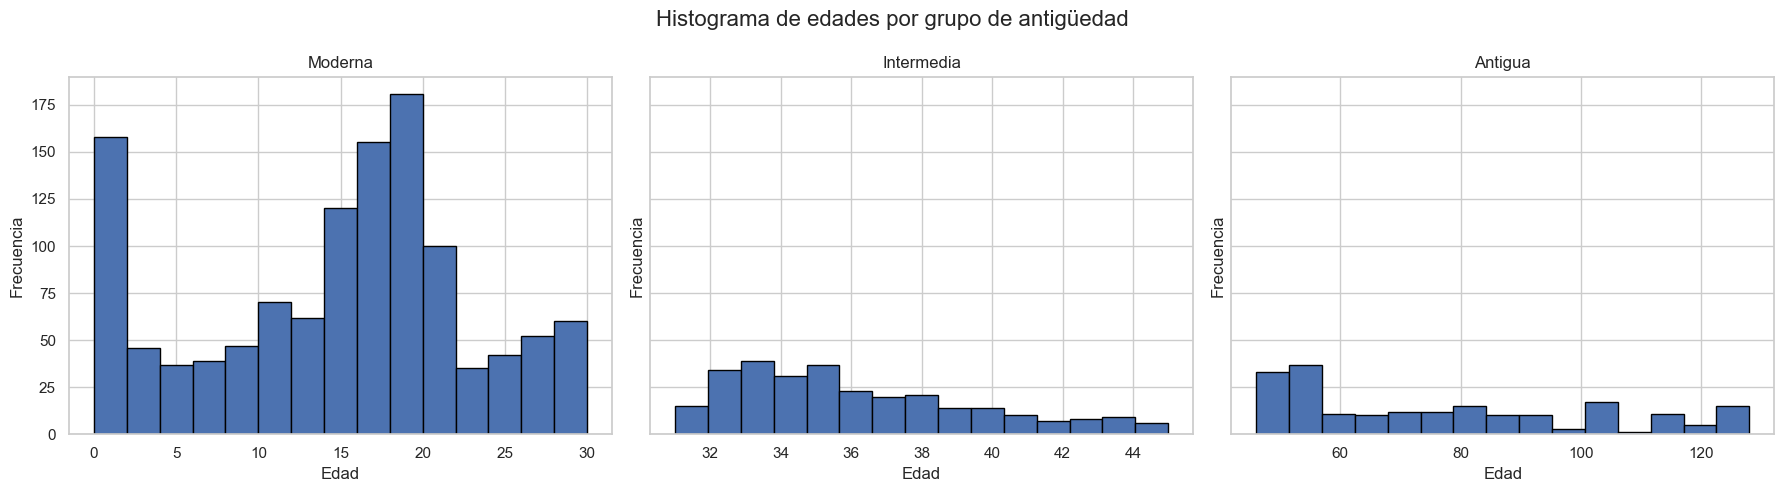

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
grupos = ["moderna", "intermedia", "antigua"]

for ax, grupo in zip(axes, grupos):
    subset = df_casas[df_casas["grupo_etario"] == grupo]
    ax.hist(subset["age"], bins=15, edgecolor='black')
    ax.set_title(f"{grupo.capitalize()}")
    ax.set_xlabel("Edad")
    ax.set_ylabel("Frecuencia")

fig.suptitle("Histograma de edades por grupo de antigüedad", fontsize=16)
plt.tight_layout()
plt.show()


### → Creo columna binaria según percentil 75

In [119]:
threshold = df_casas["price"].quantile(0.75)
df_casas["high_price"] = (df_casas["price"] > threshold).astype(int)

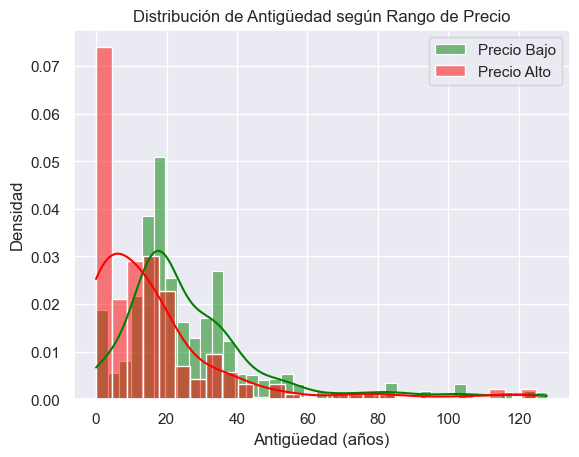

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

filtro_bajo = df_casas["high_price"] == 0
filtro_alto = df_casas["high_price"] == 1

sns.histplot(df_casas[filtro_bajo]["age"], label="Precio Bajo", color="green", kde=True, stat="density")
sns.histplot(df_casas[filtro_alto]["age"], label="Precio Alto", color="red", kde=True, stat="density")

plt.title("Distribución de Antigüedad según Rango de Precio")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Densidad")
plt.legend()
plt.show()


## 🏗️ Distribución de Antigüedad según Rango de Precio

La gráfica muestra la distribución de la antigüedad de las propiedades, diferenciando entre aquellas con **precio bajo** (verde) y **precio alto** (rojo). A partir de la visualización, se pueden destacar las siguientes conclusiones:

### 🔍 Conclusiones:

- Las **propiedades de precio alto** tienden a ser **más nuevas**: presentan un claro pico en antigüedades muy bajas (entre 0 y 10 años), lo que sugiere que las propiedades recientemente construidas tienen mayor valor en el mercado.
  
- Las **propiedades de precio bajo** muestran una **mayor dispersión** en la antigüedad, con un rango más amplio que incluye muchas viviendas de entre 15 y 50 años.

- Se observa que **la probabilidad de precio alto disminuye** a medida que aumenta la antigüedad de la propiedad.

- La densidad en propiedades de más de 60 años es prácticamente nula para ambos grupos, indicando que son menos frecuentes en el dataset.




In [121]:
df_casas

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir,grupo_etario,high_price
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No,intermedia,0
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No,moderna,0
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No,moderna,0
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes,moderna,0
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,hot air,gas,septic,No,No,No,intermedia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No,intermedia,1
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No,intermedia,1
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No,moderna,0
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No,antigua,0


### `Distribución general de la variable high_price`

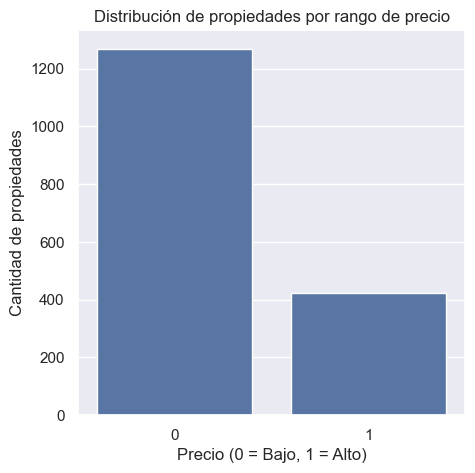

In [122]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_casas, x='high_price')
plt.title("Distribución de propiedades por rango de precio")
plt.xlabel("Precio (0 = Bajo, 1 = Alto)")
plt.ylabel("Cantidad de propiedades")
plt.show()


### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

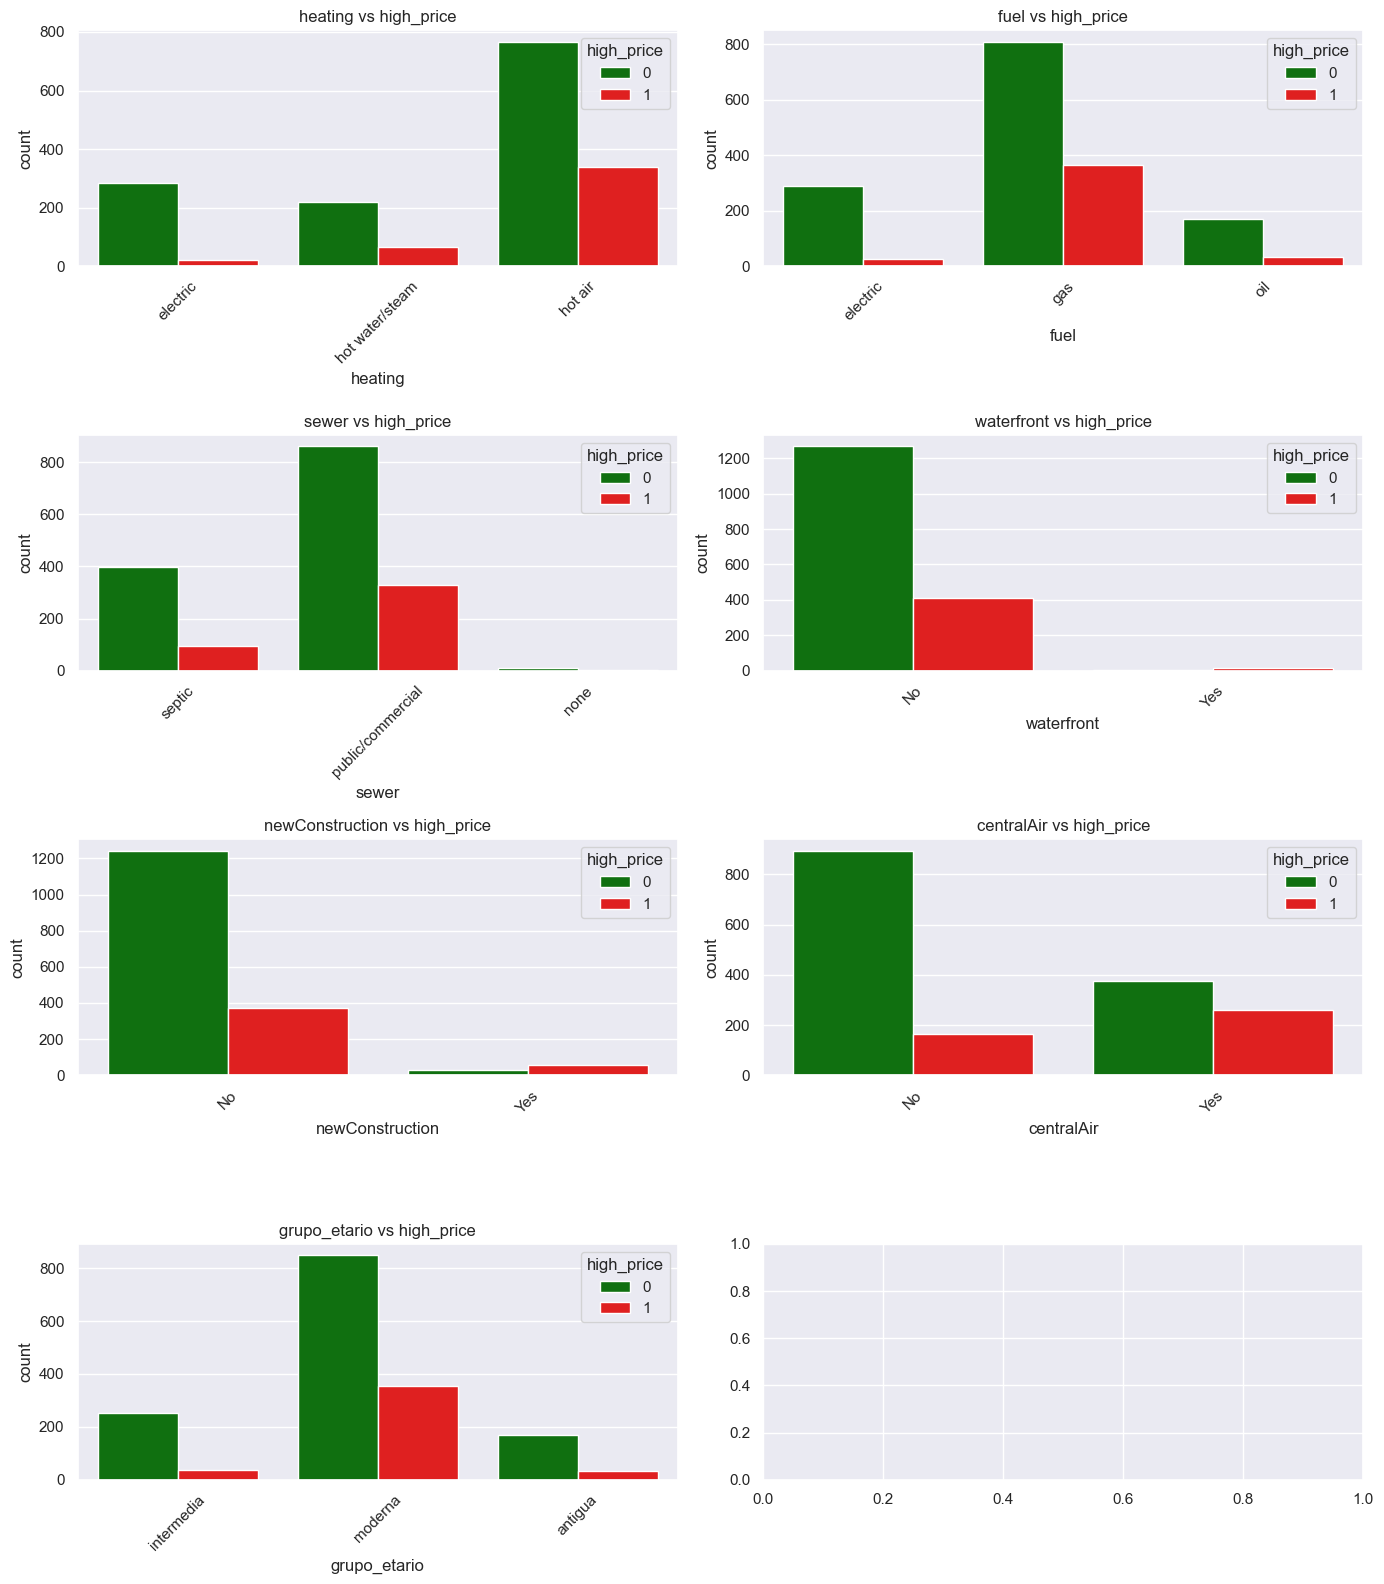

In [123]:
import math

categoricas = df_casas.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_casas, x=col, hue='high_price', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs high_price')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, las propiedades con **precio alto** tienden a compartir ciertas características que las distinguen de las de **precio bajo**. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)**       | **Tendencia en propiedades de precio alto**          |
|------------------------------------|-------------------------------------------------------|
| 🔥 `heating`                       | Más frecuentes con calefacción **hot air**           |
| ⚡ `fuel`                          | Mayor proporción de **gas** como combustible         |
| 🚽 `sewer`                        | Más propiedades con desagüe **público/comercial**     |
| 🌊 `waterfront`                   | Presencia significativa de propiedades **cerca del agua** |
| 🏗️ `newConstruction`             | Alta proporción de **nuevas construcciones**         |
| ❄️ `centralAir`                  | Mayor presencia de **aire acondicionado central**     |
| 🏠 `grupo_etario`                | Predominan propiedades **modernas (≤ 30 años)**      |

Estas observaciones indican que el **valor de las propiedades está fuertemente influenciado** por aspectos de confort, modernidad y ubicación. Elementos como acceso a infraestructura moderna (aire acondicionado, gas, cloacas) y características premium (nueva construcción, cercanía al agua) son clave en la valoración del mercado.



---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [124]:
df_casas.select_dtypes(include=['object']).columns

Index(['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction',
       'centralAir', 'grupo_etario'],
      dtype='object')

In [125]:
binarias = ['waterfront', 'newConstruction', 'centralAir']
for col in binarias:
    df_casas[col] = df_casas[col].map({'Yes': 1, 'No': 0})

In [126]:
df_casas = df_casas.drop(['grupo_etario', 'high_price'], axis=1)

In [127]:
categoricas = ['heating', 'fuel', 'sewer']
df_casas = pd.get_dummies(df_casas, columns=categoricas)

In [128]:
df_casas = df_casas.replace({True: 1, False: 0})

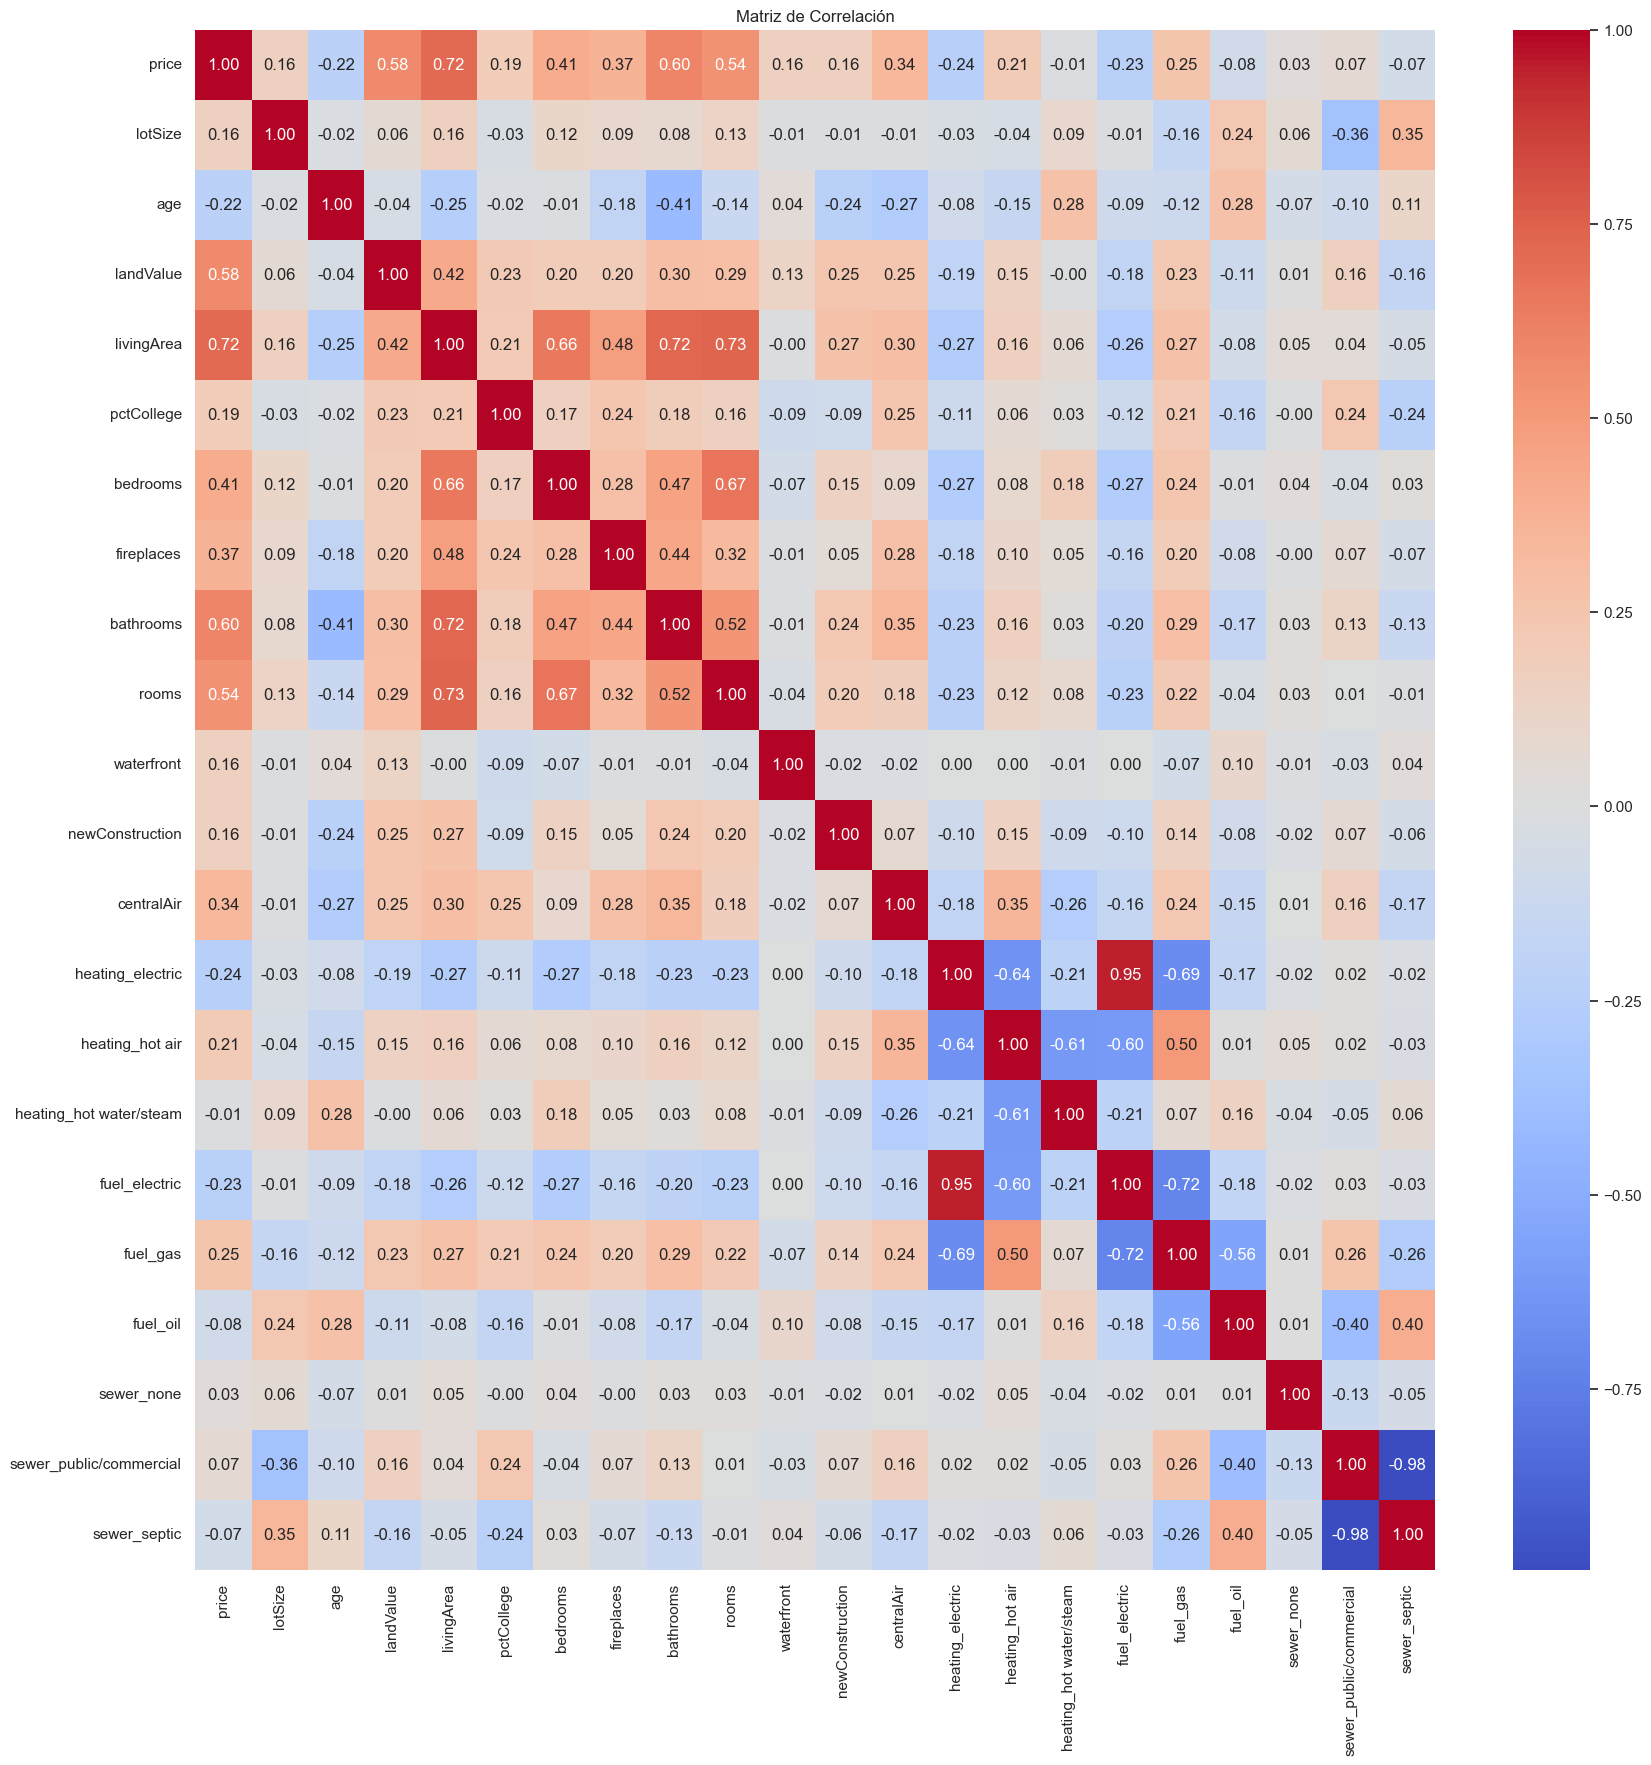

In [129]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_casas.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [130]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1694 entries, 0 to 1727
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1694 non-null   int64  
 1   lotSize                  1694 non-null   float64
 2   age                      1694 non-null   int64  
 3   landValue                1694 non-null   int64  
 4   livingArea               1694 non-null   int64  
 5   pctCollege               1694 non-null   int64  
 6   bedrooms                 1694 non-null   int64  
 7   fireplaces               1694 non-null   int64  
 8   bathrooms                1694 non-null   float64
 9   rooms                    1694 non-null   int64  
 10  waterfront               1694 non-null   int64  
 11  newConstruction          1694 non-null   int64  
 12  centralAir               1694 non-null   int64  
 13  heating_electric         1694 non-null   int64  
 14  heating_hot air          1694

In [131]:
##from scipy import stats
## df_casas = df_casas[(np.abs(stats.zscore(df_casas["price"])) < 3)]

### Hago Log Transform de la variable price.

In [132]:
df_casas["log_price"] = np.log1p(df_casas["price"])
df_casas

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,...,heating_electric,heating_hot air,heating_hot water/steam,fuel_electric,fuel_gas,fuel_oil,sewer_none,sewer_public/commercial,sewer_septic,log_price
0,132500,0.09,42,50000,906,35,2,1,1.0,5,...,1,0,0,1,0,0,0,0,1,11.794345
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,...,0,0,1,0,1,0,0,0,1,12.106893
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,...,0,1,0,0,1,0,0,0,1,11.951187
4,86060,0.11,0,15000,840,51,2,0,1.0,3,...,0,1,0,0,1,0,0,1,0,11.362812
5,120000,0.68,31,14000,1152,22,4,1,1.0,8,...,0,1,0,0,1,0,0,0,1,11.695255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,...,0,0,1,0,1,0,0,1,0,12.574185
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,...,0,0,1,0,1,0,0,1,0,12.560248
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,...,0,1,0,0,1,0,0,1,0,12.180247
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,...,0,1,0,0,1,0,0,1,0,11.736077


---

## **Parte 4: Modelado**


In [133]:
# Separo mi df en X e Y
X = df_casas.drop(['log_price'], axis=1)
y = df_casas['log_price']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [134]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporción de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("Número de muestras por clase:\n", counts)
print("\nProporción de muestras por clase:\n", prop)


Número de muestras por clase:
 log_price
12.323860    21
11.695255    21
11.918397    21
11.951187    19
12.180760    18
             ..
13.114333     1
11.530382     1
13.541075     1
12.793223     1
11.619994     1
Name: count, Length: 741, dtype: int64

Proporción de muestras por clase:
 log_price
12.323860    0.012397
11.695255    0.012397
11.918397    0.012397
11.951187    0.011216
12.180760    0.010626
               ...   
13.114333    0.000590
11.530382    0.000590
13.541075    0.000590
12.793223    0.000590
11.619994    0.000590
Name: count, Length: 741, dtype: float64


In [135]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [136]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporción de clases
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()), # Escalado de variables numericas
        #('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
        ('selector', SelectKBest(score_func=f_regression)), # Selección de k características mejores
        ('regressor', model) # Modelo
    ])

    # Hiperparámetros
    full_param_grid = {
        'selector__k': [10, 15, 20, 25, 30, 35], # número de variables a seleccionar
        **parameters # parametros propios de regresion
    }

    # Búsqueda con scoring R²
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='r2', n_iter=20, random_state=42)
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinación de hiperparámetros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento

    # Predicciones
    y_train_pred = best_model.predict(X_train)
    y_pred = best_model.predict(X_test)

    # Métricas de entrenamiento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Métricas de test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    # Prints
    print(f"Mejores parámetros: {best_params}")
    print(f"R² Train: {r2_train:.4f} | R² Test: {r2_test:.4f}")
    print(f"RMSE Train: {rmse_train:.2f} | RMSE Test: {rmse_test:.2f}")
    print(f"MAE Train: {mae_train:.2f} | MAE Test: {mae_test:.2f}")

    return r2_test, rmse_test, mae_test, best_model, r2_train, rmse_train, mae_train, best_params


---

## **Regresión Lineal**

In [138]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

# En este caso, no hay hiperparámetros para ajustar en LinearRegression
parameters_lr = {} 

lr_results = model_trial(model_lr, parameters_lr)


Mejores parámetros: {'selector__k': 15}
R² Train: 0.8665 | R² Test: 0.8855
RMSE Train: 0.17 | RMSE Test: 0.14
MAE Train: 0.09 | MAE Test: 0.09


---

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)

parameters_rf = {
    'regressor__n_estimators': [100, 200, 300],  # cantidad de árboles (más = mejor performance, más costo)
    'regressor__max_depth': [None, 5, 10, 15],  # profundidad máxima de cada árbol (None = hasta purificar hojas)
    'regressor__max_features': ['sqrt', 'log2']  # cantidad de variables consideradas por división ('sqrt' o 'log2' = regularización)
}

rf_results = model_trial(model_rf, parameters_rf)


Mejores parámetros: {'selector__k': 10, 'regressor__n_estimators': 100, 'regressor__max_features': 'log2', 'regressor__max_depth': None}
R² Train: 0.9915 | R² Test: 0.9675
RMSE Train: 0.04 | RMSE Test: 0.07
MAE Train: 0.02 | MAE Test: 0.04


---

## **XGBoost**


In [140]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

parameters_xgb = {
    'regressor__n_estimators': [100, 150, 200, 250, 300],  # cantidad de árboles a entrenar
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # tamaño del paso de actualización (más bajo = aprendizaje más lento pero más robusto)
    'regressor__max_depth': [3, 4, 5, 6, 7],  # profundidad máxima de los árboles (mayor = más complejidad)
    'regressor__min_child_weight': [4, 5, 6, 7],  # mínimo peso en nodos hoja para evitar sobreajuste
    'regressor__subsample': [0.6, 0.7, 0.8],  # proporción de muestras para cada árbol (menos = más regularización)
    'regressor__colsample_bytree': [0.6, 0.7, 0.8],  # proporción de columnas para cada árbol (menos = menos overfitting)
    'regressor__reg_alpha': [0.1, 0.5, 1],  # regularización L1 para penalizar la complejidad
    'regressor__reg_lambda': [1, 2, 3]  # regularización L2 para suavizar los pesos
}


xgb_results = model_trial(model_xgb, parameters_xgb)

Mejores parámetros: {'selector__k': 25, 'regressor__subsample': 0.8, 'regressor__reg_lambda': 1, 'regressor__reg_alpha': 1, 'regressor__n_estimators': 200, 'regressor__min_child_weight': 5, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.1, 'regressor__colsample_bytree': 0.8}
R² Train: 0.9940 | R² Test: 0.9952
RMSE Train: 0.04 | RMSE Test: 0.03
MAE Train: 0.01 | MAE Test: 0.02


---

## **LightGBM**


In [141]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(random_state=99)

parameters_lgbm = {
    'regressor__n_estimators': [100, 200, 300],  # número total de árboles a construir
    'regressor__max_depth': [2, 3, 4, 5, 6],  # profundidad máxima de cada árbol (más bajo = modelo más simple)
    'regressor__learning_rate': [0.01, 0.05],  # tasa de aprendizaje (más bajo = mayor precisión, pero más lento)
    'regressor__num_leaves': [15, 31, 50],  # cantidad máxima de hojas por árbol (más hojas = más complejidad)
    'regressor__min_child_samples': [20, 40, 60],  # mínimo de datos por hoja para evitar división por ruido
    'regressor__subsample': [0.6, 0.7, 0.8],  # porcentaje de datos usados en cada iteración (más bajo = regularización)
    'regressor__colsample_bytree': [0.6, 0.7],  # proporción de columnas por árbol (más bajo = menos overfitting)
    'regressor__reg_alpha': [0.0, 0.1, 0.5],  # regularización L1 para reducir complejidad
    'regressor__reg_lambda': [0.0, 0.1, 0.5, 1.0]  # regularización L2 para controlar overfitting
}

lgbm_results = model_trial(model_lgbm, parameters_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1037
[LightGBM] [Info] Number of data points in the train set: 1084, number of used features: 19
[LightGBM] [Info] Start training from score 12.173463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

---

In [142]:
def crear_tabla_resultados(lr, rf, xgb, lgbm, scoring='r2'):

    df_resultados = pd.DataFrame()
    df_resultados["metodo"] = ["Regresión Lineal", "Random Forest", "XGB", "LGBM"]

    df_resultados["best_model"] = [lr[3], rf[3], xgb[3], lgbm[3]]
    df_resultados["best_params"] = [lr[7], rf[7], xgb[7], lgbm[7]]

    # Test
    df_resultados["r2_test"] = [lr[0], rf[0], xgb[0], lgbm[0]]
    df_resultados["rmse_test"] = [lr[1], rf[1], xgb[1], lgbm[1]]
    df_resultados["mae_test"] = [lr[2], rf[2], xgb[2], lgbm[2]]

    # Train
    df_resultados["r2_train"] = [lr[4], rf[4], xgb[4], lgbm[4]]
    df_resultados["rmse_train"] = [lr[5], rf[5], xgb[5], lgbm[5]]
    df_resultados["mae_train"] = [lr[6], rf[6], xgb[6], lgbm[6]]

    # Ordenar según la métrica principal
    df_resultados = df_resultados.sort_values(by=f"{scoring}_test", ascending=False)

    return df_resultados


In [143]:
tabla = crear_tabla_resultados(lr_results, rf_results, xgb_results, lgbm_results, scoring='r2')
display(tabla)

,metodo,best_model,best_params,r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train
2,XGB,"(StandardScaler(), SelectKBest(k=25, score_fun...","{'selector__k': 25, 'regressor__subsample': 0....",0.995231,0.027949,0.015237,0.993958,0.035713,0.011824
3,LGBM,"(StandardScaler(), SelectKBest(k=35, score_fun...","{'selector__k': 35, 'regressor__subsample': 0....",0.985380,0.048938,0.025614,0.976991,0.069692,0.021235
1,Random Forest,"(StandardScaler(), SelectKBest(score_func=<fun...","{'selector__k': 10, 'regressor__n_estimators':...",0.967525,0.072938,0.038617,0.991514,0.042323,0.015504
0,Regresión Lineal,"(StandardScaler(), SelectKBest(k=15, score_fun...",{'selector__k': 15},0.885482,0.136966,0.086316,0.866492,0.167876,0.088289


In [144]:
def plot_regression_scores(lr, rf, xgb, lgbm):
    # Nombres de modelos y resultados
    nombres = ["Regresión Lineal", "Random Forest", "XGBoost", "LightGBM"]
    
    r2_scores = [lr[0], rf[0], xgb[0], lgbm[0]]
    rmse_scores = [lr[1], rf[1], xgb[1], lgbm[1]]
    mae_scores = [lr[2], rf[2], xgb[2], lgbm[2]]

    # Crear DataFrame
    df_plot = pd.DataFrame({
        "Modelo": nombres,
        "R²": r2_scores,
        "RMSE": rmse_scores,
        "MAE": mae_scores
    })

    # Estilo general
    sns.set(style="whitegrid")

    # Gráfico de R²
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_plot, x="Modelo", y="R²", palette="Blues_d")
    plt.title("Comparación de R² (Test)")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # Gráfico de RMSE
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_plot, x="Modelo", y="RMSE", palette="Reds_d")
    plt.title("Comparación de RMSE (Test)")
    plt.tight_layout()
    plt.show()

    # Gráfico de MAE
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_plot, x="Modelo", y="MAE", palette="Greens_d")
    plt.title("Comparación de MAE (Test)")
    plt.tight_layout()
    plt.show()


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_64763/4274540726.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Modelo", y="R²", palette="Blues_d")


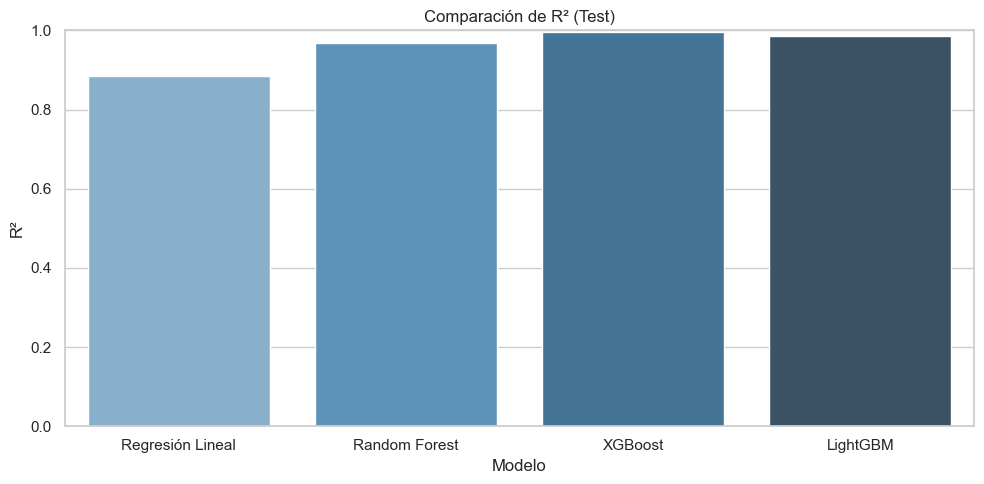

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_64763/4274540726.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Modelo", y="RMSE", palette="Reds_d")


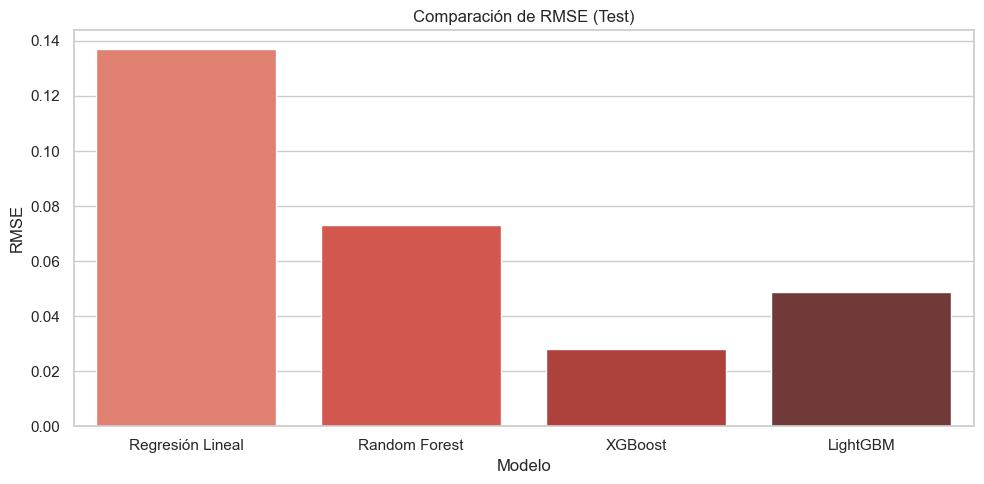

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_64763/4274540726.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Modelo", y="MAE", palette="Greens_d")


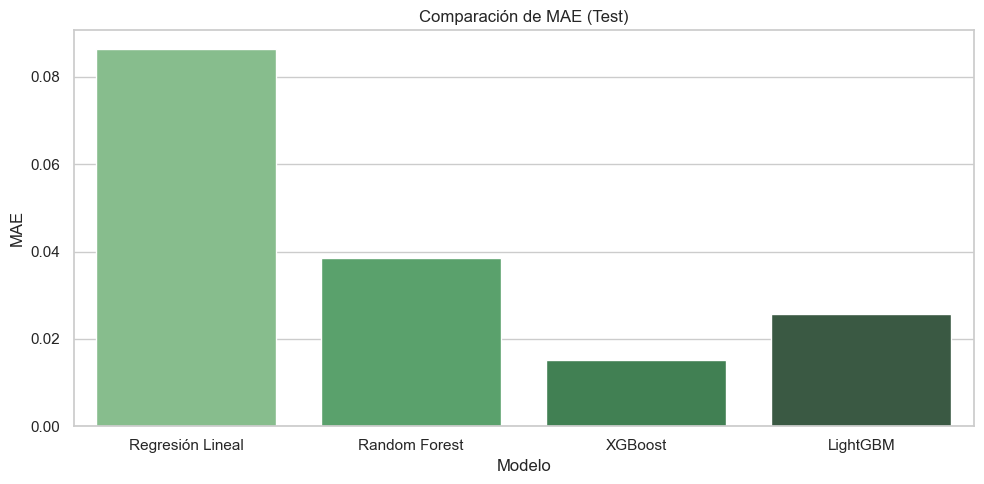

In [145]:
plot_regression_scores(lr_results, rf_results, xgb_results, lgbm_results)


### 📊 Conclusiones del Desempeño de Modelos de Regresión

Luego de entrenar y evaluar distintos modelos para predecir el precio de propiedades, se observan los siguientes resultados en el conjunto de test:

| Modelo               | R² (Test) | RMSE (Test) | MAE (Test) |
|----------------------|-----------|-------------|------------|
| **XGBoost**          | 0.9952    | 0.0279      | 0.0152     |
| **LightGBM**         | 0.9854    | 0.0489      | 0.0256     |
| **Random Forest**    | 0.9675    | 0.0729      | 0.0386     |
| **Regresión Lineal** | 0.8855    | 0.1370      | 0.0863     |

---

### ✅ Observaciones clave

- **XGBoost** fue el mejor modelo, alcanzando un **R² de 0.995** en test, lo que indica que casi toda la varianza del precio es explicada por el modelo. Además, presenta el **menor error absoluto (MAE)** y **cuadrático (RMSE)**.
- **LightGBM** también mostró un rendimiento excelente, aunque levemente inferior a XGBoost.
- **Random Forest** ofrece buen desempeño, pero con errores más altos y menor capacidad explicativa que los modelos de boosting.
- **Regresión Lineal** obtuvo resultados aceptables (R² = 0.885), pero claramente no captura relaciones no lineales presentes en los datos.

---

### 🧠 Conclusión final

El uso de modelos **ensemble de boosting (XGBoost y LightGBM)** es altamente recomendable para este problema, ya que logran una **mejor generalización y menor error** sin signos claros de sobreajuste. Si se prioriza interpretabilidad, puede usarse regresión lineal como baseline, pero para **predicciones precisas de precios**, se justifica plenamente la mayor complejidad de los modelos no lineales.

